Topic Modelling using dimensionality reduction and cluster embedding   
Team members:   
Akram shaik (Z1857655)   
Mohammed Mansoor Shareef (Z1874994)

Importing the necessary libaraies 

In [ ]:
# Importing pandas and numpy for creating dataframes and performing mathematical operations on the data
import pandas as pd
import numpy as np
# Importing the stopwords library from nltk.corpus package to remove stopwords
from nltk.corpus import stopwords
# Importing the WordNetlemmatizer from the nltk.corpus foe perfroming the word lemmatization
from nltk.stem.wordnet import WordNetLemmatizer
import string
# Importing the regular expression libraries
import re
 # Importing punctuations from the string library to remove the punctuations from the text
from string import punctuation
import warnings
warnings.filterwarnings("ignore")

To make the data available to anyone who have an access to the code file the dataset is made avaialble through the shared google drive link with the specified path.

NOTE: Changes to the path would be required before mounting the dataset because notebook and the datset should be in the same folder.

In [ ]:
# Using the drive library from the googlecolab package to mount the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


here in the data_dir we specify the path were the datset and tghe notebook are avaiable in the google drive.

In [ ]:
data_dir = r'drive/My Drive/isr project/'
data = pd.read_csv(data_dir + '2020-03-00 Coronavirus Tweets (pre 2020-03-12).CSV')

We are extracting only the text coloum from the datset which contains the tweets because of the task of project and creating a new datset instead of dropping other columns from the datset will make sure that even if we perfom any actions our data would not be corrupted and can be regained from the orignal data.

In [ ]:
# storing the text part of the tweets in dataframe tweets
tweets = data[['text']]
print(tweets.shape)
tweets.head()

(526791, 1)


,text
0,#CoronaVirusIndonesia \n#CoronaBukaBorokRezim ...
1,#CoronaVirusIndonesia \n#CoronaBukaBorokRezim ...
2,China’s wildlife trade via @SCMPgraphics http...
3,Proof that the media such as @CNN is unnecessa...
4,Indians are a shitty breed of humans. With the...


As we are running the dataset on our local pc's the time for the excecution will be very long and the server runtime will get crashed. Due to this reason we are excecuting our program on 20,000 tweets but same program can aslo it excecuted on the complete datset if we have the appropriate hardware

In [ ]:
# Dataframe tweets_sample contains the number of tweets 
tweets_sample= tweets.head(20000)
print(tweets_sample.shape)
tweets_sample.head()

(20000, 1)


,text
0,#CoronaVirusIndonesia \n#CoronaBukaBorokRezim ...
1,#CoronaVirusIndonesia \n#CoronaBukaBorokRezim ...
2,China’s wildlife trade via @SCMPgraphics http...
3,Proof that the media such as @CNN is unnecessa...
4,Indians are a shitty breed of humans. With the...


 Here we are creating a list of all the tweets to perform preprocessing on it

In [ ]:
lines=tweets_sample['text'].tolist()

In [ ]:
# Downloading stopwords,wordnet and words from the nltk package
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
# Importing wordnet from nltk to check if the words are in english language
from nltk.corpus import wordnet
# creating a set of words that contains all the stopwords from english language
stop = set(stopwords.words('english'))

# Creating a set of characters that contains all the punctuation marks in english grammer
exclude = set(string.punctuation)
# Creating an instance of wordnetlemmatizer function to apply lemmatization each word
lemma = WordNetLemmatizer()
# Creating set of words from the nltk package of english language to check if words are in english
words = set(nltk.corpus.words.words())
# Cleaning the text sentences so that stopwords,hastags,mentions,digits and https links, punctuations,emojis and other language characters are removed
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    #print('stopfree: ',stop_free)
    hash_free = re.sub(r"#\S+", "", stop_free)
    mention_free = re.sub(r"@\S+", "", hash_free)
    num_free = re.sub(r"\d+","",mention_free)
    #print('number free: ', num_free)
    link_free = re.sub(r"https\S+", "", num_free)
    punc_free = ''.join(ch for ch in link_free if ch not in exclude)
    otherlang_free = ''.join(ch for ch in punc_free if ch in words or ch == ' ')
    #print('punc: ',punc_free)
    #print('other: ',otherlang_free)
    normalized = " ".join(lemma.lemmatize(word) for word in otherlang_free.split())
    #print('normalized: ',normalized)
    len_free = ''.join(word for word in otherlang_free if len(word)>=1 )
    #print('len free:',len_free)
    len_free1 = len_free.split()
    #print(len_free1)
    lang_free = ' '.join(word for word in len_free1 if wordnet.synsets(word))
    #print(lang_free)
    y = lang_free.split()
    return y

In [ ]:
# Creating a list for cleaned sentences after the preprocessing is done
train_clean_sentences = []
for line in lines:
    line = line.strip()
    # calling clean function on each tweet
    cleaned = clean(line)
    cleaned = ' '.join(cleaned)
    if(len(cleaned)==0):
        continue
    # Appending all the cleaned tweets into the list    
    train_clean_sentences.append(cleaned)
#print(train_clean_sentences)

In [4]:
# Installing the flair library
#!pip install flair 

In [5]:
# Installing upgraded fliar from the provided link
#!pip install --upgrade git+https://github.com/flairNLP/flair.git

In [ ]:
# Creating a datframe from the list of cleaned tweets 
Cleaned_tweets = pd.DataFrame(train_clean_sentences, columns=['cleaned_tweets'])

In [ ]:
# Importing Torch and flair library
import torch
import flair

In [ ]:
# importing the required embeddings from the flair library
from flair.embeddings import FlairEmbeddings, DocumentPoolEmbeddings, BertEmbeddings
# initialise embedding classes
flair_embedding_forward = FlairEmbeddings('news-forward')
flair_embedding_backward = FlairEmbeddings('news-backward')
bert_embedding = BertEmbeddings('bert-base-uncased')
# combine word embedding models
document_embeddings = DocumentPoolEmbeddings([bert_embedding, flair_embedding_backward, flair_embedding_forward])

In [ ]:
# importing tqdm to keep track of loop 
from tqdm import tqdm
# Importing sentence from flair to consider each tweet as a sentence
from flair.data import Sentence

In [ ]:
# Intailly creating an empty tensor which is the size of data by 7168
X = torch.empty(size=(len(Cleaned_tweets.index), 7168))
# fill tensor with embeddings
i=0
# looping throygh all the tweets and applying the embeddin on each 
for text in tqdm(Cleaned_tweets['cleaned_tweets']):
    sentence = Sentence(text)
    document_embeddings.embed(sentence)
    embedding = sentence.get_embedding()
    # Storing the embedded tweeet into tensor
    X[i] = embedding
    # incrementing the value of i after each embedding
    i += 1

100%|██████████| 17063/17063 [3:55:40<00:00,  1.21it/s]


In [ ]:
# Deattaching the datset from the cpu and converting it into numpy format
X = X.cpu().detach().numpy()

In [ ]:
# Importing PCA from sk.learn library
from sklearn.decomposition import PCA
# We are creating 1000 components from 20000 tweets
pca = PCA(n_components=1000)
X_pca = pca.fit_transform(X)

In [ ]:
# importing the agglomarative clustering from the sklearn.cluster
from sklearn.cluster import AgglomerativeClustering
# The number of clusters is taken to be 10
N_CLUSTERS = 10
# using ward clustering linkage method and affinity as euclidean
Agg_Cluster = AgglomerativeClustering(n_clusters=N_CLUSTERS, affinity='euclidean', linkage='ward')
# storing the predicted topics into the pred_ward object and storing it in datframe of cleaned tweets
pred_ward = Agg_Cluster.fit_predict(X_pca)
Cleaned_tweets['topic'] = pred_ward

In [ ]:
# Extracting labels of clusters
labels=Agg_Cluster.labels_
#print(labels)

In [ ]:
#print(X_pca.shape, X.shape)

In [ ]:
# imporing matplot library to visualize the clusters
import matplotlib.pyplot as plt
%matplotlib inline

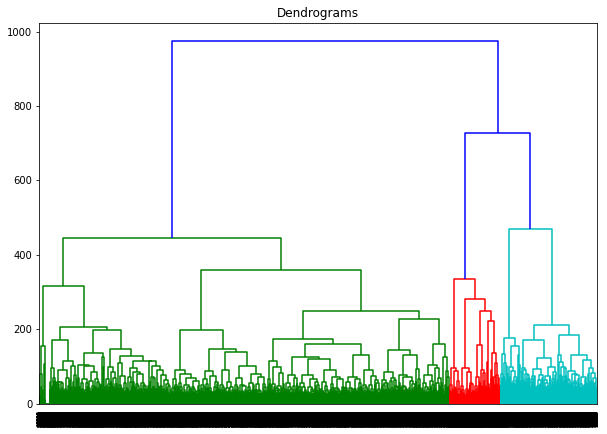

In [ ]:
# importing shc from the scipy.cluster to plot the dendogram
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
Dend_plot = shc.dendrogram(shc.linkage(X_pca, method='ward'))

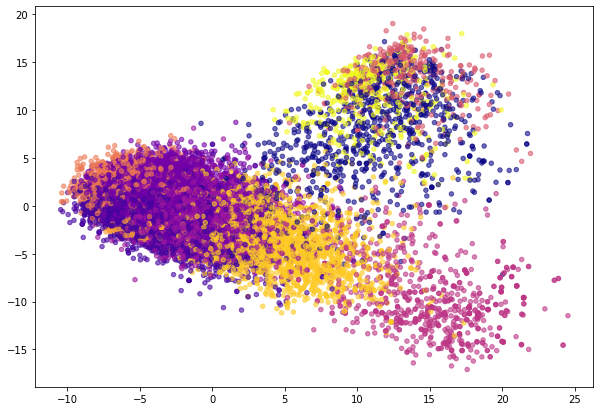

In [ ]:
# creating scatter plot to analyse how clusters are distributed
plt.figure(figsize=(10,7))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, s=20, cmap='plasma', alpha=0.6)

In [ ]:
# printing tweets after the clustering
Cleaned_tweets.head(10)

,cleaned_tweets,topic
0,chinas wildlife trade value guide,1
1,proof media unnecessary spreading panic hype r...,2
2,indians shitty breed humans emergency looming ...,2
3,india techies asked leave person working build...,1
4,todays insightful episode answered frequently ...,1
5,para el en el,5
6,donates nm combat,8
7,geneva motor show cancelled swiss government b...,1
8,cases novel detected far globally,1
9,protect maybe even,8


In [ ]:
Cleaned_tweets.shape

(17063, 2)

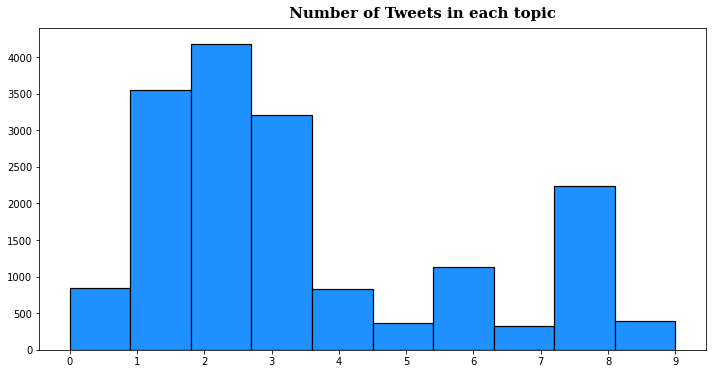

In [ ]:
# Plotting a bar plot on the clustured data to show how many tweets each topic contain
fig = plt.figure(1, figsize = (10, 5))
ax = fig.add_subplot()
ax.hist(Cleaned_tweets['topic'], bins= 10,edgecolor='black', color='dodgerblue', linewidth=1.2)
plt.xticks(np.arange(0, 10, step=1))
#ax.set_xticklabels(labels=['0','1','2','3','4','5','6','7','8','9'], rotation = 90)
plt.figtext(0.4,1," Number of Tweets in each topic", color='black',ma='center',fontsize=15,family='serif',weight='bold')
plt.tight_layout()

In [ ]:
# Importing tfidf vectorizer from the sklearn.feature to apply penalty of frequently apperaing words
from sklearn.feature_extraction.text import TfidfVectorizer
# function to get top tf-idf words  
def get_top_words(documents, top_n):
  # creating instance of tfidf vectorizer
  vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_df=0.5)
  tfidf_matrix = vectorizer.fit_transform(documents)
  feature_names = vectorizer.get_feature_names()
  topic_tfidf = pd.DataFrame()
  # looping through the tweets to get score for each word in the topics
  for doc in range(len(documents)):
    words = []
    scores = []
    feature_index = tfidf_matrix[doc,:].nonzero()[1]
    tfidf_scores = zip(feature_index, [tfidf_matrix[doc, x] for x in feature_index])
    for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
      words.append(w)
      scores.append(s)
    df_temp = pd.DataFrame(data={'word':words, 'score':scores})
    df_temp = df_temp.sort_values('score',ascending=False).head(top_n)
    df_temp['topic'] = doc
    topic_tfidf = topic_tfidf.append(df_temp)
  return topic_tfidf

In [ ]:
topic_doc_list = []
# group text into topic-documents
for topic in range(N_CLUSTERS):
    topic_doc_list.append(' '.join(Cleaned_tweets[Cleaned_tweets['topic']==topic]['cleaned_tweets'].values))


In [ ]:
# apply function
topic_tfidf = get_top_words(topic_doc_list, 10)
topic_tfidf

,word,score,topic
4036,der,0.393549,0
3996,ci,0.292389,0
3783,pi,0.201017,0
3947,cas,0.170009,0
4082,das,0.132918,0
...,...,...,...
2589,de la,0.190869,9
2683,au,0.190032,9
2601,pas,0.163923,9
2561,le de,0.118120,9


In [ ]:
# Creating a dataframe which has grouped words of similar topic
final_topics=pd.DataFrame(topic_tfidf.groupby('topic').agg(lambda x: list(x)))
final_topics=final_topics.drop(columns=['score'], axis=1)
final_topics.head()

,word
topic,
0,"[der, ci, pi, cas, das, des, poi, chi, perch, ..."
1,"[first, world, confirmed cases, schools, count..."
2,"[hands, need, wash, world, masks, wash hands, ..."
3,"[hands, january updating, article latest, spre..."
4,"[ces se, looks like, like looks, say do, ces, ..."


In [ ]:
# Printing the topics with their top 10 words
for i in range(10):
  print('Topic ', i,': ', final_topics['word'][i])

Topic  0 :  ['der', 'ci', 'pi', 'cas', 'das', 'des', 'poi', 'chi', 'perch', 'aus']
Topic  1 :  ['first', 'world', 'confirmed cases', 'schools', 'countries', 'emergency', 'country', 'two', 'number', 'south korea']
Topic  2 :  ['hands', 'need', 'wash', 'world', 'masks', 'wash hands', 'keep', 'way', 'may', 'medical']
Topic  3 :  ['hands', 'january updating', 'article latest', 'spread th', 'figures regularly', 'updating article', 'latest figures', 'th january', 'tracking spread', 'regularly']
Topic  4 :  ['ces se', 'looks like', 'like looks', 'say do', 'ces', 'ab', 'het', 'das', 'mac', 'thank mr']
Topic  5 :  ['el', 'el de', 'para', 'las', 'la de', 'de la', 'en el', 'de de', 'de en', 'de las']
Topic  6 :  ['world', 'many', 'need', 'around', 'much', 'country', 'way', 'days', 'already', 'getting']
Topic  7 :  ['date total', 'deaths date', 'total deaths', 'confirmed worldwide', 'cases confirmed', 'total cases', 'deaths total', 'china cases', 'bringing total', 'reports new']
Topic  8 :  ['need

**From the above clustered words in topics we can analyze that:   **   
1)Topic 1 talks about confirmed cases in different parts of the worls and its effect on schools.   
2)Topic 2 talks about the suggested precusionary measures spoken to be safe from virus.   
3)Topic 3 talks about the articles being published and updates and latest figures.   
4)Topic 6 talks about the may be the days passed after covid around the world.   
5)Topic 7 talks about total deaths and confirmed cases around the world.   
6)Topic 8 talks about may the advice people are giving to world after the outbreak.   
7) Topic 0, 4, 5, 9 are in spanish or some languages whose meanings are not clear to us.

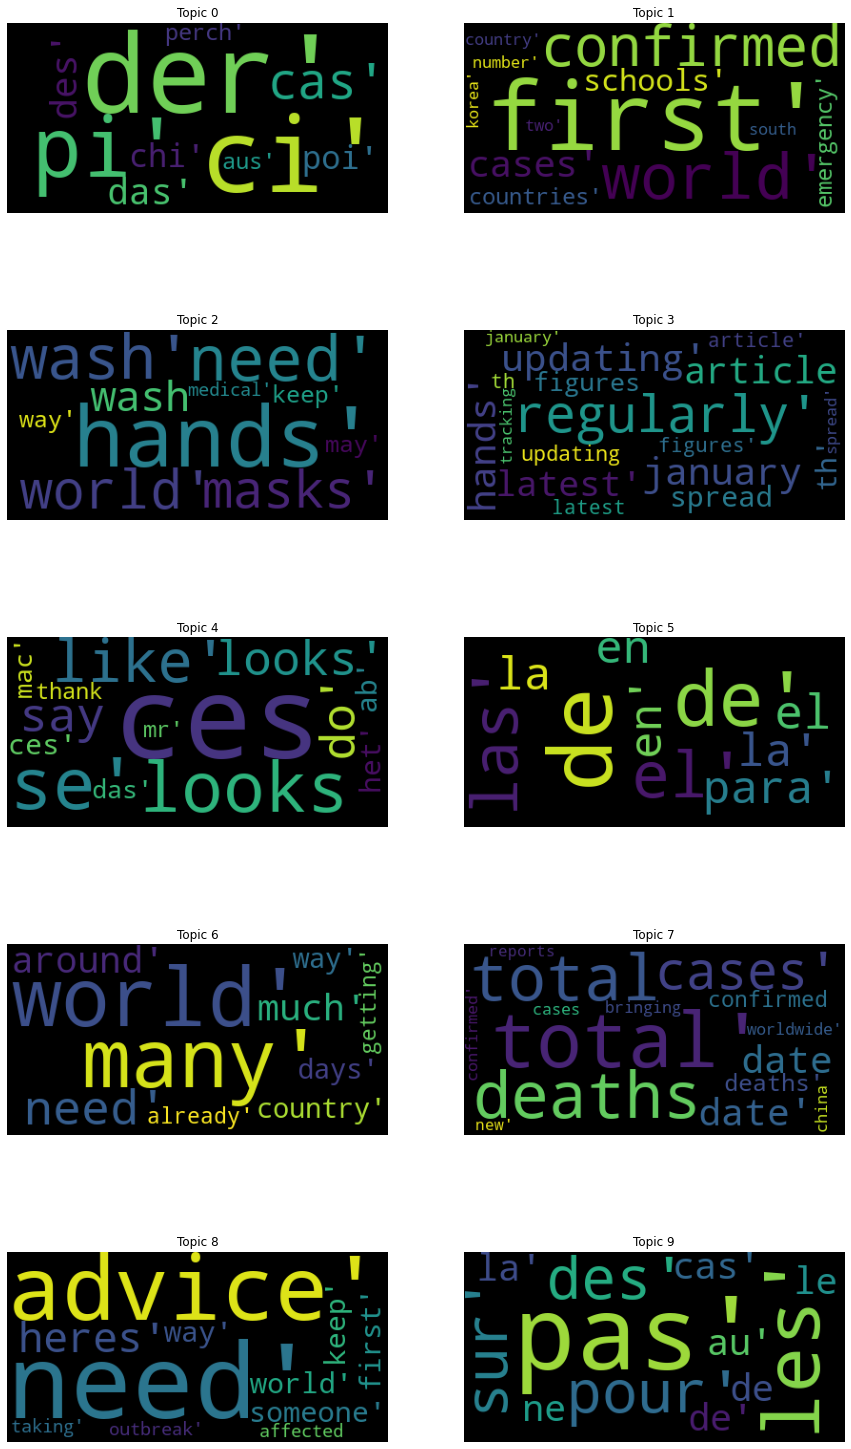

In [ ]:
# Importing the word cloud to visulaize the word in each topic in form of cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 2, figsize=(15,15))

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = str(final_topics['word'][i])
    cloud = WordCloud()
    cloud.generate(topic_words)
    fig.subplots_adjust(top = 1.5)
    plt.imshow(cloud)
    plt.gca().set_title('Topic ' + str(i))
    plt.gca().axis('off')

In [ ]:
#creating a list for storing value of centroids of each cluster
centroids = []
for topic in tqdm(range(N_CLUSTERS)):
    X_topic = X_pca[Cleaned_tweets.index[Cleaned_tweets['topic']==topic]]
    X_mean = np.mean(X_topic, axis=0)
    centroids.append(X_mean)

100%|██████████| 10/10 [00:00<00:00, 103.49it/s]


In [ ]:
# importing euclidean library from scipy to evaluate euclidian distance of each topic
from scipy.spatial.distance import euclidean
# creating a list of empty list for distances
distances = []
for row in tqdm(Cleaned_tweets.index):
    centroid = centroids[Cleaned_tweets.iloc[row]['topic']]
    X_row = X_pca[row]
    distance = euclidean(centroid, X_row)
    distances.append(distance)
#    
Cleaned_tweets['topic_distance'] = distances

100%|██████████| 17063/17063 [00:03<00:00, 4392.50it/s]


In [ ]:
# importing distant matrix from scipy to find distance matrix with the clusters
from scipy.spatial import distance_matrix
df_dist_matrix = pd.DataFrame(distance_matrix(centroids, centroids), index=range(N_CLUSTERS), columns=range(N_CLUSTERS))

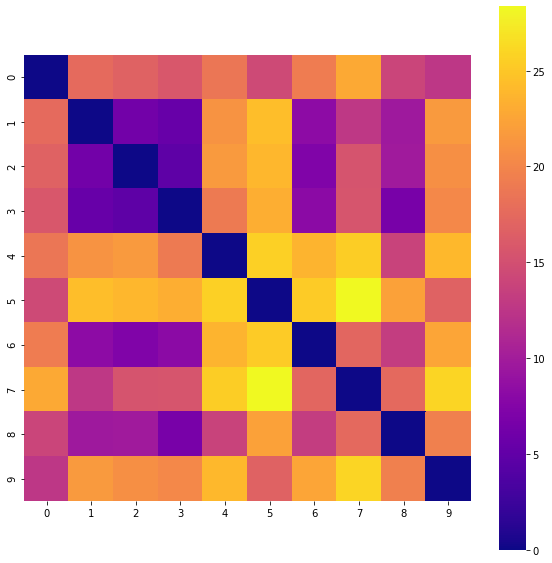

In [ ]:
#importing saebprm library to visualize the distance matrix and evaluate the model.
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df_dist_matrix, square=True, cmap='plasma')

In [ ]:
# From the above heatmap we can analyze that topics 1,2 and 3 are very similar. And topics 4 and 5 are very different.
# with this distance matrix visualization we can evaluate by comparing it with the topics plot we have done before word cloud we can say that this models performence is good. 